# 특정 시작년도~끝년도의 특정 월의 최고/최저 평균온도

In [103]:
# 모듈 로딩
import pandas as pd
import platform
import matplotlib.pyplot as plt

In [104]:
# 운영체제별 한글 폰트 설정
system_name=platform.system()
system_name

if system_name == 'Windows': # 윈도우라면
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # 맥 OS라면
    print('Mac OS')
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux': # 리눅스라면
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else: # 다른 운영체제라면
    print("Not support")
    
# system_name에는 해당 컴퓨터의 운영체제의 이름이 할당됨
# 해당 운영체제에 참이면 if문 실행

Windows OS


## 데이터 전처리를 위한 사전작업
- 사용자함수에서 전처리를 어떻게 진행할지 알아보기위해 하는 작업 

In [105]:
# 파일 불러오기
weather_data=pd.read_csv('../Data/daegu.csv',encoding='euc_kr')
weather_data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-01-31,143,NaN,-7.0,0.8
1,1907-02-01,143,NaN,NaN,NaN
2,1907-02-02,143,NaN,NaN,NaN
3,1907-02-03,143,NaN,NaN,NaN
4,1907-02-04,143,NaN,NaN,NaN
...,...,...,...,...,...
42150,2022-06-26,143,28.4,24.4,32.8
42151,2022-06-27,143,27.3,25.4,30.1
42152,2022-06-28,143,28.9,24.8,32.3
42153,2022-06-29,143,29.5,27.7,33.7


In [106]:
# 파일 정보 확인
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42155 entries, 0 to 42154
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42155 non-null  object 
 1   지점       42155 non-null  int64  
 2   평균기온(℃)  41452 non-null  float64
 3   최저기온(℃)  41526 non-null  float64
 4   최고기온(℃)  41525 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [107]:
# 열이름 변경
weather_data.columns=['날짜', '지점', '평균기온', '최저기온', '최고기온']
weather_data

,날짜,지점,평균기온,최저기온,최고기온
0,1907-01-31,143,NaN,-7.0,0.8
1,1907-02-01,143,NaN,NaN,NaN
2,1907-02-02,143,NaN,NaN,NaN
3,1907-02-03,143,NaN,NaN,NaN
4,1907-02-04,143,NaN,NaN,NaN
...,...,...,...,...,...
42150,2022-06-26,143,28.4,24.4,32.8
42151,2022-06-27,143,27.3,25.4,30.1
42152,2022-06-28,143,28.9,24.8,32.3
42153,2022-06-29,143,29.5,27.7,33.7


In [108]:
# 날짜열 데이터 타입 변경
weather_data['날짜']=pd.to_datetime(weather_data['날짜'])
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42155 entries, 0 to 42154
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      42155 non-null  datetime64[ns]
 1   지점      42155 non-null  int64         
 2   평균기온    41452 non-null  float64       
 3   최저기온    41526 non-null  float64       
 4   최고기온    41525 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [115]:
# 결측치 행 제거
weather_data.dropna(axis=0)

# weather_data=weather_data.dropna(axis=0)해야만 weather_data에서 결측치가 사라짐

,날짜,지점,평균기온,최저기온,최고기온
701,1909-01-01,143,-4.1,-8.0,0.1
702,1909-01-02,143,-0.8,-6.7,6.1
703,1909-01-03,143,1.0,-2.4,3.6
704,1909-01-04,143,4.2,0.0,9.2
705,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
42150,2022-06-26,143,28.4,24.4,32.8
42151,2022-06-27,143,27.3,25.4,30.1
42152,2022-06-28,143,28.9,24.8,32.3
42153,2022-06-29,143,29.5,27.7,33.7


## 사용자 함수 만들기

In [133]:
# 사용자 함수 만들기
def avgondo(st_ye,fi_ye,mon):
    weather_data=pd.read_csv('../Data/daegu.csv',encoding='euc_kr') # 파일불러오기
    weather_data=weather_data.dropna(axis=0) # 결측치제거
    weather_data.columns=['날짜', '지점', '평균기온', '최저기온', '최고기온'] # 열이름변경
    weather_data['날짜']=pd.to_datetime(weather_data['날짜']) # 날짜열 타입변경
    year_list=list(range(st_ye,fi_ye+1)) # 시작~끝년도의 리스트 만들기
    high_ondo_list=[] # 각 년도/월별 최고온도를 담기위한 리스트생성
    low_ondo_list=[] # 각 년도/월별 최저온도를 담기위한 리스트생성
    for ye in year_list: # 시작~끝년도를 하나씩 반복문 수행
        ye_df=weather_data[weather_data['날짜'].dt.year==ye] # 해당연도의 데이터 추출
        ye_mon_df=ye_df[ye_df['날짜'].dt.month==mon] # 해당 년도 데이터에서 해당 달 데이터 추출
        high_ondo_list.append(round(ye_mon_df['최고기온'].mean(),1)) # 해당 년/월의 최고기온의 평균을 리스트에 저장
        low_ondo_list.append(round(ye_mon_df['최저기온'].mean(),1)) # 해당 년/월의 최저기온의 평균을 리스트에 저장
    print(f"{st_ye}년부터 {fi_ye}년까지 {mon}월의 기온변화")
    print()
    print(f"{mon}월 최저기온 평균:")
    for a in low_ondo_list:
        print(a,end=', ')
    print()
    print(f"{mon}월 최고기온 평균:")
    for b in high_ondo_list:
        print(b,end=', ')
    plt.figure(figsize=(20,5)) # 그래프 크기
    plt.rc('axes', unicode_minus=False) # 마이너스 부호
    plt.title(f"{st_ye}년부터 {fi_ye}년까지 {mon}월의 기온변화") # 그래프 제목
    plt.plot(year_list,low_ondo_list,'blue',marker='s',label='최저기온')
    plt.plot(year_list,high_ondo_list,'red',marker='s',label='최고기온')
    plt.legend(loc=5) # 범례
    plt.show()
    
# 사용자 함수의 2번째 줄인 결측치 제거를 주석처리하면 1907~1908년도의 평균온도도
# 구할수는 있지만 결측치값이 많아서 제거했음
# 그래서 1907~1908년도의 평균온도는 구할 수 없음 => nan이 나옴

1909년 1월부터 2022년 6월까지만 입력하세요!!!
시작 년도를 입력하세요 >>> 1907
마지막 년도를 입력하세요 >>> 1908
기온변화를 측정할 달을 입력하세요 >>> 2
1907년부터 1908년까지 2월의 기온변화

2월 최저기온 평균:
nan, nan, 
2월 최고기온 평균:
nan, nan, 

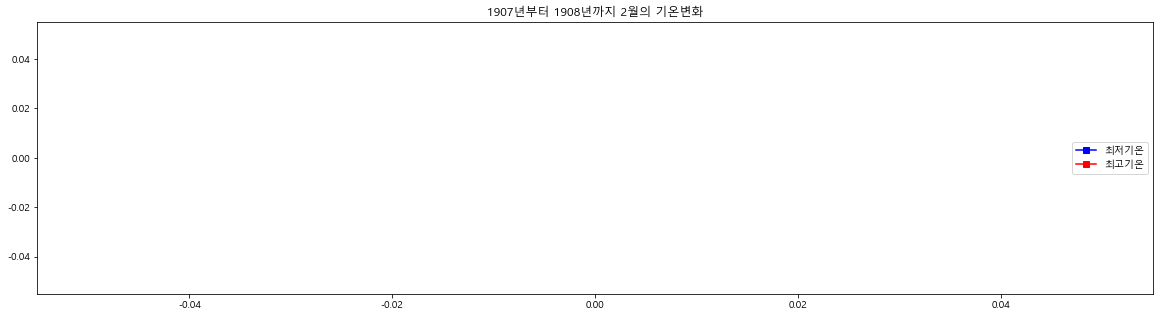

In [134]:
# 실행시켜보기
print(f"1909년 1월부터 2022년 6월까지만 입력하세요!!!")
st_ye=int(input('시작 년도를 입력하세요 >>> '))
fi_ye=int(input('마지막 년도를 입력하세요 >>> '))
mon=int(input('기온변화를 측정할 달을 입력하세요 >>> '))
avgondo(st_ye,fi_ye,mon)